##### Importing Packages

In [297]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression

##### Loading Data

In [3]:
TASK_PATH = r"C:\Users\jpgsa\Documents\BOLT" + "\\"
file1 = "Dataset Task 2.xlsx"
df1_raw = pd.read_excel(TASK_PATH + file1, sheet_name = "Data")

df1_raw.head()

,Created Date,Country,City,Restaurant ID,Restaurant Name,Order State,Cancel Reason,Cuisine,Platform,Payment Method,Card Issuer,Products in Order,Order Value € (Gross),Delivery Fee,Delivery Time
0,28.02.2020,Portugal,Lisbon,7238,Chirashi - Alvalade,delivered,NaN,Sushi,ios,cashless,BANKINTER S.A.,13,89.30,0.0,17.7
1,28.02.2020,Portugal,Lisbon,12758,Istanbul Kebab Pizza - Alameda,delivered,NaN,Pizza,android,cashless,BANCO COMERCIAL PORTUGUES S.A.,1,10.00,0.0,16.3
2,28.02.2020,Portugal,Lisbon,6631,A-100 - Lisboa,delivered,NaN,Burgers,ios,cashless,BANCO COMERCIAL PORTUGUES S.A.,2,16.96,0.0,13.6
3,28.02.2020,Portugal,Lisbon,10535,La Paparrucha - Parrilla Argentina,delivered,NaN,South American,ios,cashless,ING BANK N.V.,3,25.15,4.2,26.1
4,28.02.2020,Portugal,Lisbon,9695,Choupana Caffe,delivered,NaN,Brunch,ios,cashless,INTESA SANPAOLO SPA,3,16.00,0.0,11.6


##### Questions to be answered:

1. Do we have any seasonality in the countries shown?
2. Use your knowledge to predict with the available data. How many orders we will have in March 2020 in each country shown?
3. Please tell us any other valuable insight that you can extract from the data available and what would you do to solve it.

##### 1) Seasonality

In [9]:
df1_raw.groupby(["Country","City"]).count()["Created Date"]

Country   City  
Ghana     Accra     14132
Portugal  Lisbon    85486
Name: Created Date, dtype: int64

##### 1.1) Exploring Portugal's Dataset

In [87]:
df_portugal = df1_raw[df1_raw["Country"] == "Portugal"].copy()

metrics = ["Products in Order",
           "Order Value € (Gross)"]

df_portugal = df_portugal[["Created Date"] + metrics]

df_portugal["Created Date"] = pd.to_datetime(df_portugal["Created Date"], format="%d.%m.%Y")
df_portugal["# Orders"] = 1 ## placeholder to get count of orders

df_portugal_grouped = df_portugal.groupby("Created Date").sum().reset_index()

weekref = {0:'2 - Monday', 1:'3 - Tuesday', 2:'4 - Wednesday ', 3:'5 - Thursday', 4:'6 - Friday', 5:'7 - Saturday', 6:'1 - Sunday'}
df_portugal_grouped["Week Day"] = df_portugal_grouped["Created Date"].apply(lambda x: weekref[x.weekday()])
df_portugal_grouped["Week of Year"] = df_portugal_grouped["Created Date"].apply(lambda x: x.isocalendar()[1])
df_portugal_grouped["AOV"] = df_portugal_grouped["Order Value € (Gross)"] / df_portugal_grouped["# Orders"]

Text(0.5, 1.0, 'Orders in Portugal - Daily')

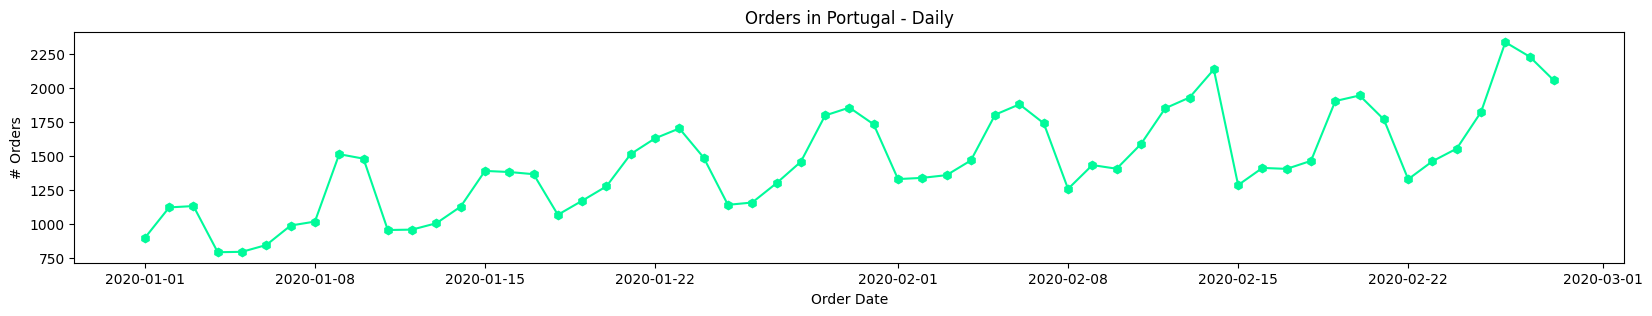

In [347]:
plt.figure(figsize=(20,3))
plt.plot(df_portugal_grouped ["Created Date"], df_portugal_grouped ["# Orders"], marker = "h", color = "mediumspringgreen")
plt.xlabel('Order Date')  
plt.ylabel('# Orders')  
plt.title("Orders in Portugal - Daily") 

Text(0.5, 1.0, 'Gross Revenue in Portugal - Daily')

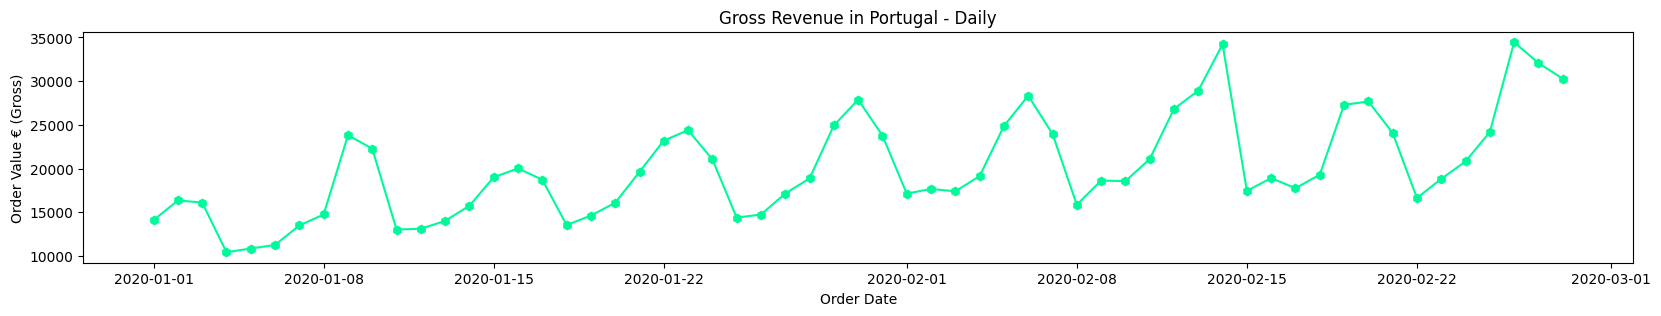

In [43]:
plt.figure(figsize=(20,3))
plt.plot(df_portugal_grouped ["Created Date"], df_portugal_grouped ["Order Value € (Gross)"], marker = "h", color = "mediumspringgreen")
plt.xlabel('Order Date')  
plt.ylabel('Order Value € (Gross)')  
plt.title("Gross Revenue in Portugal - Daily") 

Text(0.5, 1.0, 'AOV in Portugal - Daily')

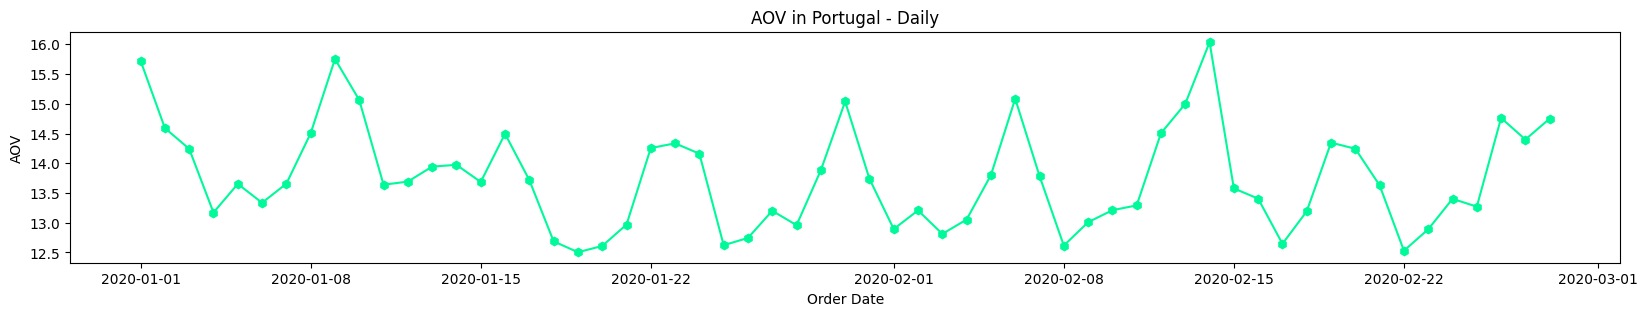

In [65]:
plt.figure(figsize=(20,3))
plt.plot(df_portugal_grouped ["Created Date"], df_portugal_grouped ["AOV"], marker = "h", color = "mediumspringgreen")
plt.xlabel('Order Date')  
plt.ylabel('AOV')  
plt.title("AOV in Portugal - Daily") 

In [115]:
df_portugal_grouped_week_ref = df_portugal_grouped[["Week of Year", "Order Value € (Gross)", "# Orders"]]
df_portugal_grouped_week_ref = df_portugal_grouped_week_ref.groupby("Week of Year").sum()
df_portugal_grouped_week_ref = df_portugal_grouped_week_ref.rename(columns={"Order Value € (Gross)": "Order Value € (Gross) (Week)",
                                                                            "# Orders": "# Orders (Week)"})
df_portugal_grouped_week_ref = df_portugal_grouped_week_ref.reset_index()
df_portugal_grouped = df_portugal_grouped.merge(df_portugal_grouped_week_ref, how ='inner')

df_portugal_grouped["perc. of weekly orders"] = df_portugal_grouped["# Orders"]  / df_portugal_grouped["# Orders (Week)"] 
df_portugal_grouped["perc. of weekly revenue"] = df_portugal_grouped["Order Value € (Gross)"]  / df_portugal_grouped["Order Value € (Gross) (Week)"] 

# df_portugal_grouped.groupby("Week of Year").count()["Created Date"]
# We'll only use weeks to 2 to 8 to to the "day of week" evaluation, since weeks 1 and 9 only have 5 days

df_portugal_grouped_2 = df_portugal_grouped [(df_portugal_grouped["Week of Year"] > 1) & (df_portugal_grouped["Week of Year"] < 9)]
df_portugal_grouped_2 = df_portugal_grouped_2 [["Week Day","perc. of weekly orders","perc. of weekly revenue"]]

<Axes: >

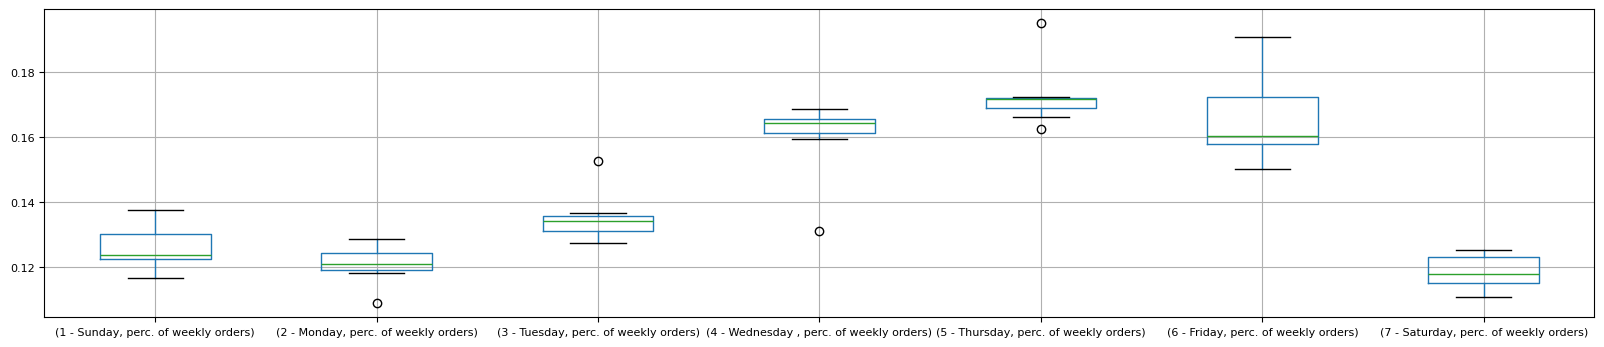

In [185]:
perc_orders_weekly = df_portugal_grouped_2[["Week Day","perc. of weekly orders"]].groupby("Week Day")
perc_orders_weekly.boxplot(subplots=False, figsize=(20,4), fontsize=8) 

<Axes: >

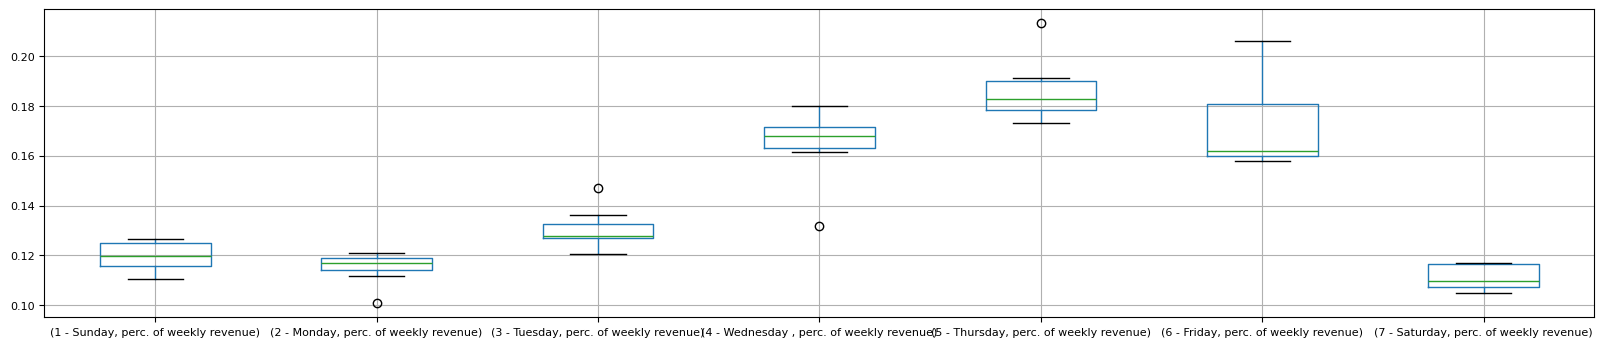

In [118]:
perc_revenue_weekly = df_portugal_grouped_2[["Week Day","perc. of weekly revenue"]].groupby("Week Day")
perc_revenue_weekly.boxplot(subplots=False, figsize=(20,4), fontsize=8) 

<Axes: >

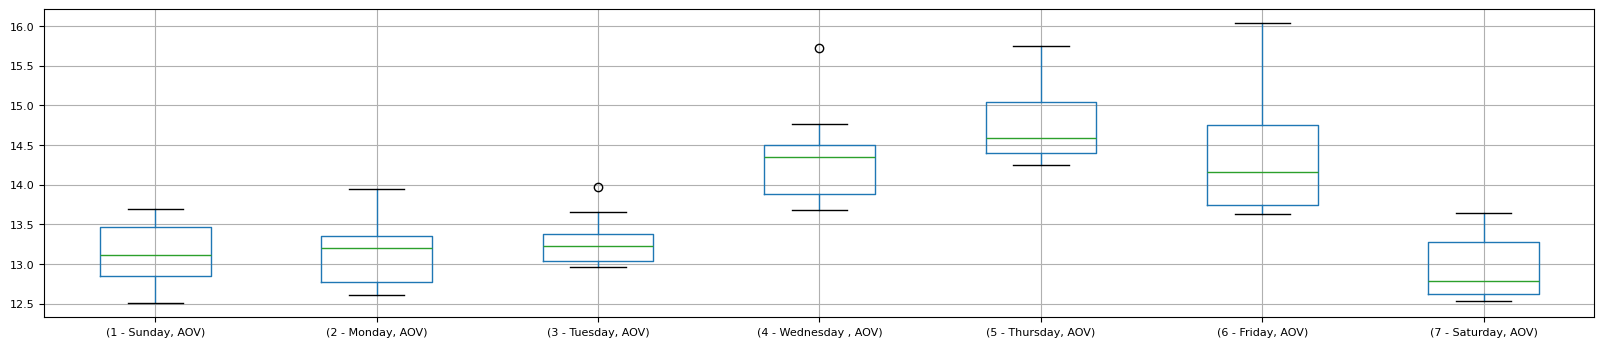

In [124]:
aov_weekly = df_portugal_grouped[["Week Day", "AOV"]].groupby("Week Day")
aov_weekly.boxplot(subplots=False, figsize=(20,4), fontsize=8) 

Text(0.5, 1.0, 'Gross Revenue Weekly - Portugal')

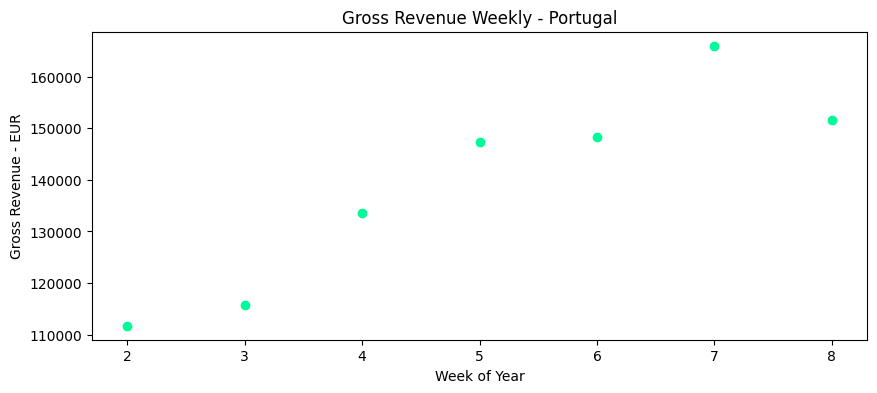

In [189]:
plt.figure(figsize=(10,4))
df_portugal_grouped_week_plot = df_portugal_grouped_week_ref [(df_portugal_grouped_week_ref["Week of Year"] > 1)
                                                              & (df_portugal_grouped_week_ref["Week of Year"] < 9)]
plt.scatter(df_portugal_grouped_week_plot ["Week of Year"]
            , df_portugal_grouped_week_plot ["Order Value € (Gross) (Week)"]
            , color = "mediumspringgreen")

plt.ylabel("Gross Revenue - EUR")  
plt.xlabel("Week of Year")  
plt.title("Gross Revenue Weekly - Portugal") 

Text(0.5, 1.0, '# Orders Weekly - Portugal')

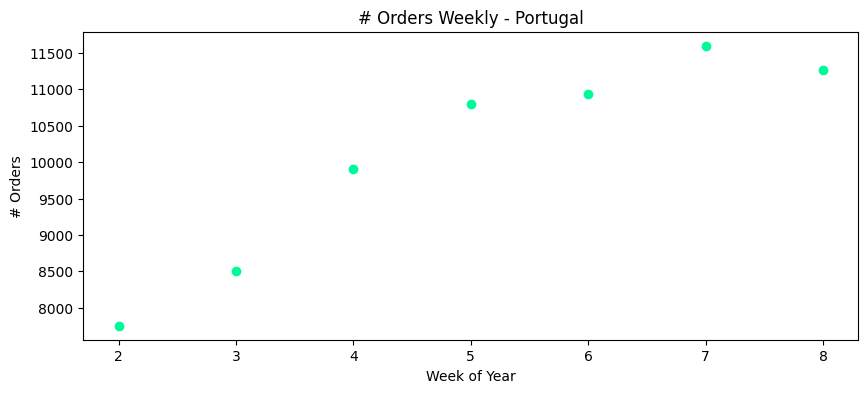

In [190]:
plt.figure(figsize=(10,4))
df_portugal_grouped_week_plot = df_portugal_grouped_week_ref [(df_portugal_grouped_week_ref["Week of Year"] > 1)
                                                              & (df_portugal_grouped_week_ref["Week of Year"] < 9)]
plt.scatter(df_portugal_grouped_week_plot ["Week of Year"]
            , df_portugal_grouped_week_plot ["# Orders (Week)"]
            , color = "mediumspringgreen")

plt.ylabel("# Orders")  
plt.xlabel("Week of Year")  
plt.title("# Orders Weekly - Portugal") 

##### 1.2) Exploring Ghana's Dataset

In [154]:
df_ghana = df1_raw[df1_raw["Country"] == "Ghana"].copy()

metrics = ["Products in Order",
           "Order Value € (Gross)"]

df_ghana = df_ghana[["Created Date"] + metrics]

df_ghana["Created Date"] = pd.to_datetime(df_ghana["Created Date"], format="%d.%m.%Y")
df_ghana["# Orders"] = 1 ## placeholder to get count of orders

df_ghana_grouped = df_ghana.groupby("Created Date").sum().reset_index()

weekref = {0:'2 - Monday', 1:'3 - Tuesday', 2:'4 - Wednesday ', 3:'5 - Thursday', 4:'6 - Friday', 5:'7 - Saturday', 6:'1 - Sunday'}
df_ghana_grouped["Week Day"] = df_ghana_grouped["Created Date"].apply(lambda x: weekref[x.weekday()])
df_ghana_grouped["Week of Year"] = df_ghana_grouped["Created Date"].apply(lambda x: x.isocalendar()[1])
df_ghana_grouped["AOV"] = df_ghana_grouped["Order Value € (Gross)"] / df_ghana_grouped["# Orders"]

Text(0.5, 1.0, 'Orders in Ghana - Daily')

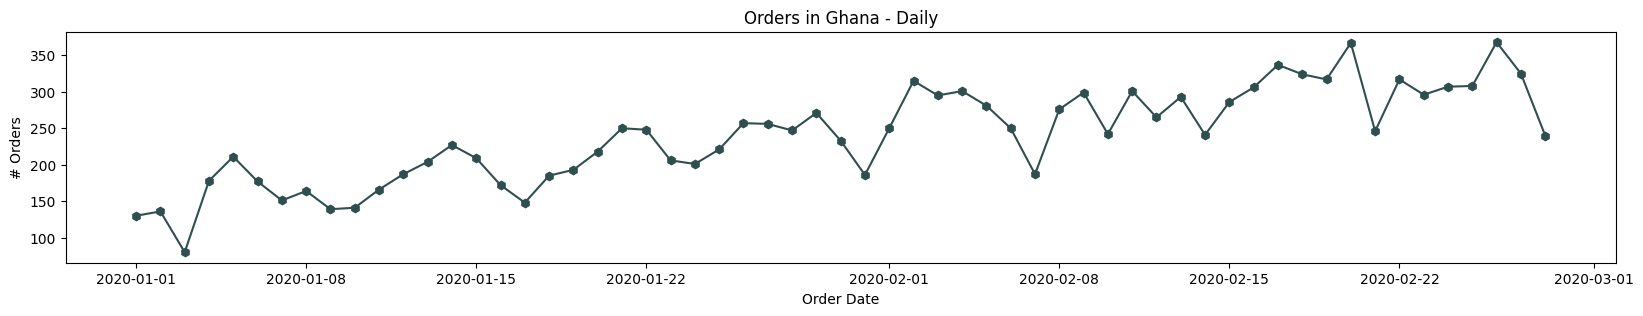

In [348]:
plt.figure(figsize=(20,3))
plt.plot(df_ghana_grouped ["Created Date"], df_ghana_grouped ["# Orders"], marker = "h", color = "darkslategrey")
plt.xlabel('Order Date')  
plt.ylabel('# Orders') 
plt.title("Orders in Ghana - Daily") 

Text(0.5, 1.0, 'Gross Revenue in Ghana- Daily')

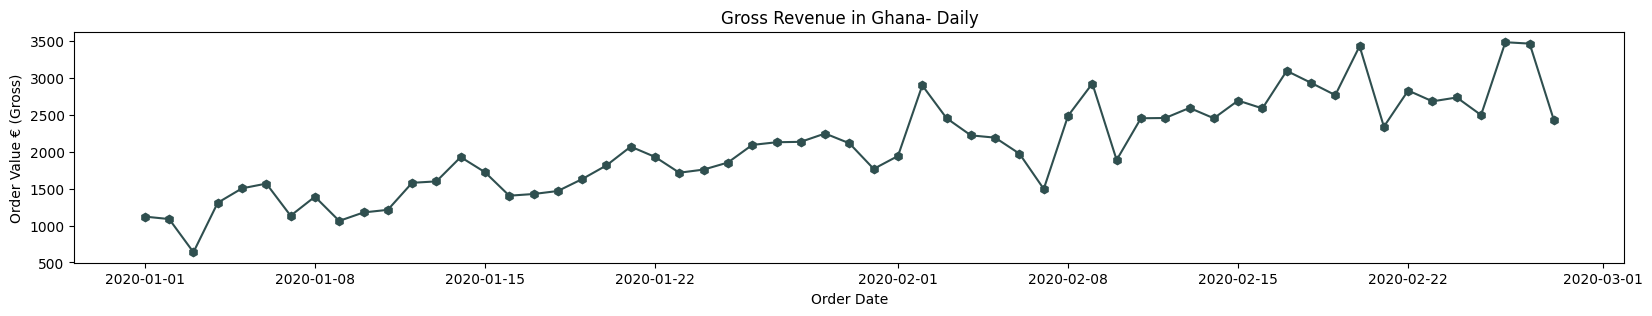

In [159]:
plt.figure(figsize=(20,3))
plt.plot(df_ghana_grouped ["Created Date"], df_ghana_grouped ["Order Value € (Gross)"], marker = "h", color = "darkslategrey")
plt.xlabel('Order Date')  
plt.ylabel('Order Value € (Gross)')  
plt.title("Gross Revenue in Ghana- Daily") 

Text(0.5, 1.0, 'AOV in Ghana - Daily')

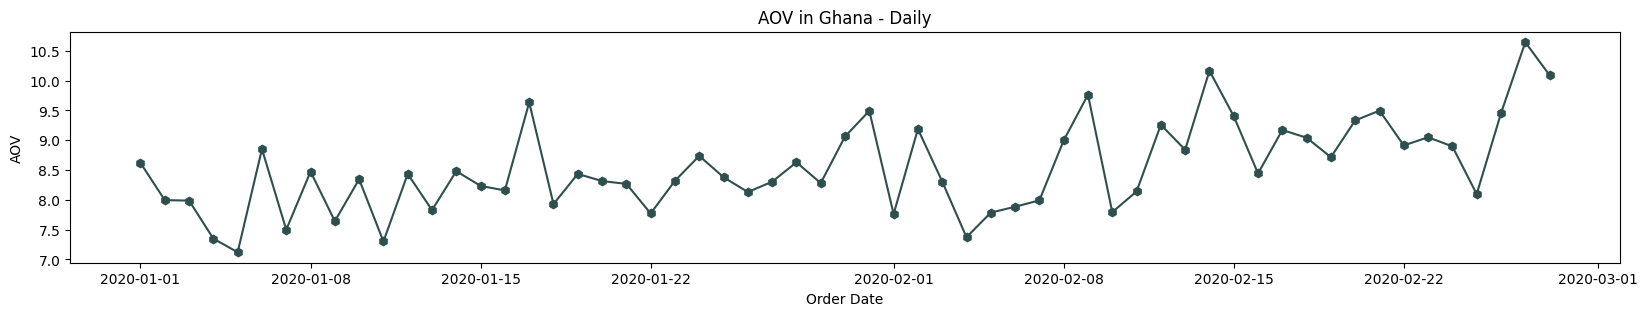

In [161]:
plt.figure(figsize=(20,3))
plt.plot(df_ghana_grouped ["Created Date"], df_ghana_grouped ["AOV"], marker = "h", color = "darkslategrey")
plt.xlabel('Order Date')  
plt.ylabel('AOV')  
plt.title("AOV in Ghana - Daily") 

In [162]:
df_ghana_grouped_week_ref = df_ghana_grouped[["Week of Year", "Order Value € (Gross)", "# Orders"]]
df_ghana_grouped_week_ref = df_ghana_grouped_week_ref.groupby("Week of Year").sum()
df_ghana_grouped_week_ref = df_ghana_grouped_week_ref.rename(columns={"Order Value € (Gross)": "Order Value € (Gross) (Week)",
                                                                            "# Orders": "# Orders (Week)"})
df_ghana_grouped_week_ref = df_ghana_grouped_week_ref.reset_index()
df_ghana_grouped = df_ghana_grouped.merge(df_ghana_grouped_week_ref, how ='inner')

df_ghana_grouped["perc. of weekly orders"] = df_ghana_grouped["# Orders"]  / df_ghana_grouped["# Orders (Week)"] 
df_ghana_grouped["perc. of weekly revenue"] = df_ghana_grouped["Order Value € (Gross)"]  / df_ghana_grouped["Order Value € (Gross) (Week)"] 

# df_ghana_grouped.groupby("Week of Year").count()["Created Date"]
# We'll only use weeks to 2 to 8 to to the "day of week" evaluation, since weeks 1 and 9 only have 5 days

df_ghana_grouped_2 = df_ghana_grouped [(df_ghana_grouped["Week of Year"] > 1) & (df_ghana_grouped["Week of Year"] < 9)]
df_ghana_grouped_2 = df_ghana_grouped_2 [["Week Day","perc. of weekly orders","perc. of weekly revenue"]]

<Axes: >

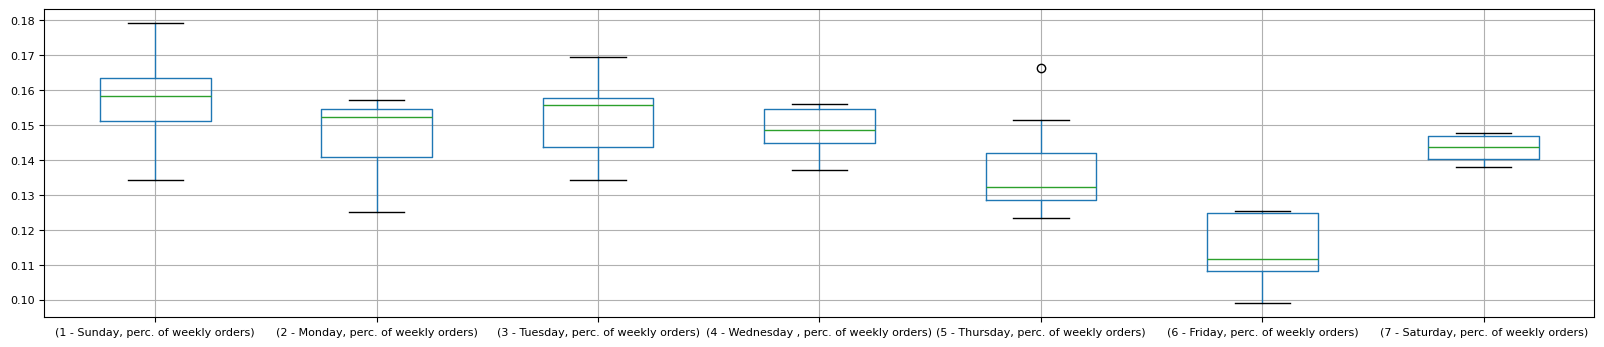

In [163]:
perc_orders_weekly = df_ghana_grouped_2[["Week Day","perc. of weekly orders"]].groupby("Week Day")
perc_orders_weekly.boxplot(subplots=False, figsize=(20,4), fontsize=8) 

<Axes: >

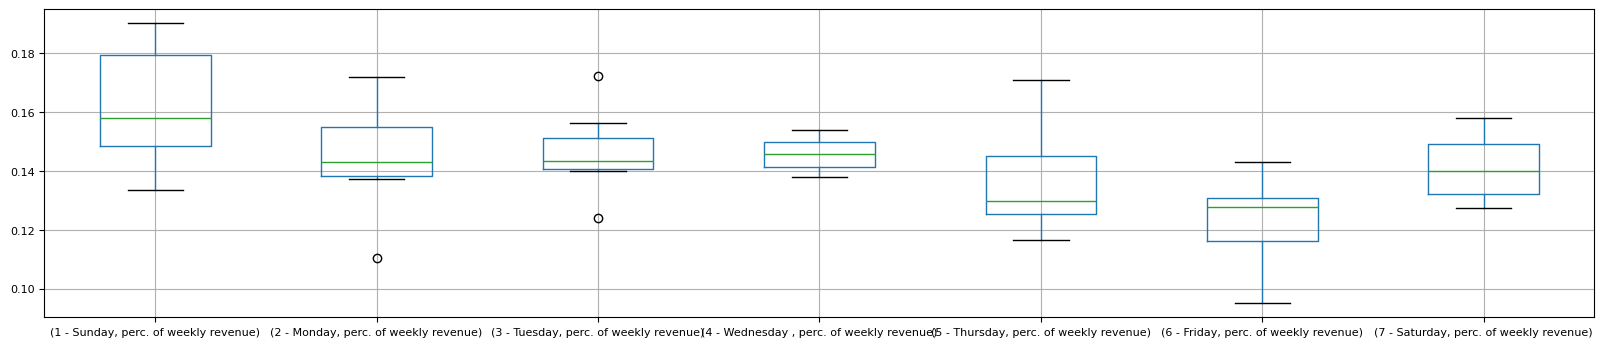

In [164]:
perc_revenue_weekly = df_ghana_grouped_2[["Week Day","perc. of weekly revenue"]].groupby("Week Day")
perc_revenue_weekly.boxplot(subplots=False, figsize=(20,4), fontsize=8) 

<Axes: >

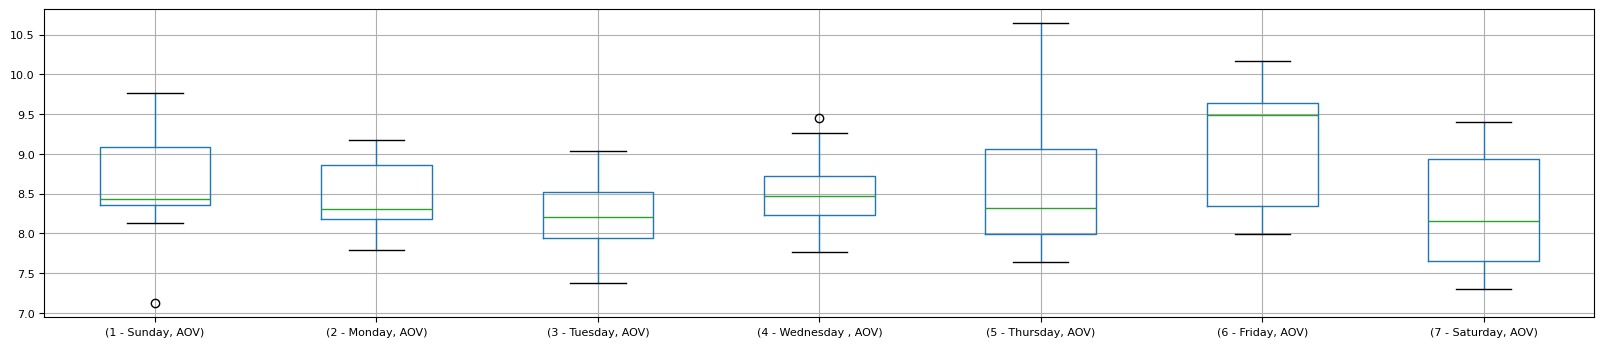

In [165]:
aov_weekly = df_ghana_grouped[["Week Day", "AOV"]].groupby("Week Day")
aov_weekly.boxplot(subplots=False, figsize=(20,4), fontsize=8) 

Text(0.5, 1.0, 'Gross Revenue Weekly - Ghana')

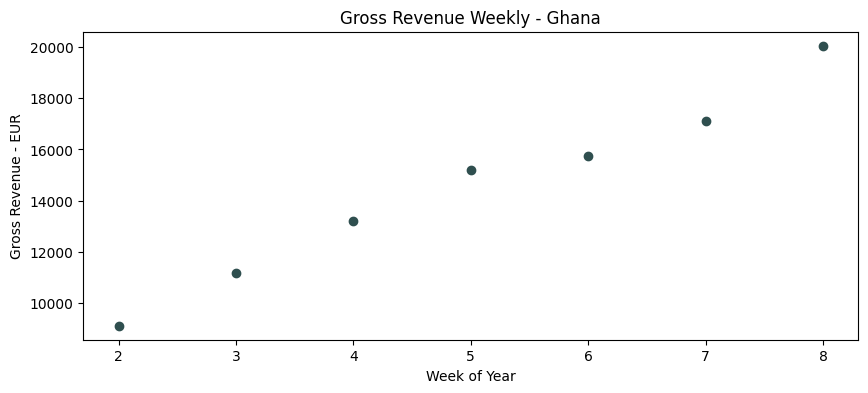

In [191]:
plt.figure(figsize=(10,4))
df_ghana_grouped_week_plot = df_ghana_grouped_week_ref [(df_ghana_grouped_week_ref["Week of Year"] > 1)
                                                              & (df_ghana_grouped_week_ref["Week of Year"] < 9)]
plt.scatter(df_ghana_grouped_week_plot ["Week of Year"]
            , df_ghana_grouped_week_plot ["Order Value € (Gross) (Week)"]
            , color = "darkslategrey")

plt.ylabel("Gross Revenue - EUR")  
plt.xlabel("Week of Year")  
plt.title("Gross Revenue Weekly - Ghana") 

Text(0.5, 1.0, '# Orders Weekly - Ghana')

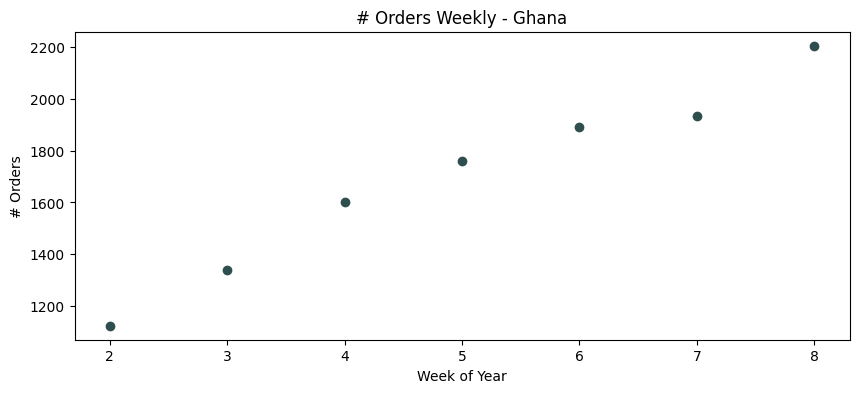

In [192]:
plt.figure(figsize=(10,4))
df_ghana_grouped_week_plot = df_ghana_grouped_week_ref [(df_ghana_grouped_week_ref["Week of Year"] > 1)
                                                              & (df_ghana_grouped_week_ref["Week of Year"] < 9)]
plt.scatter(df_ghana_grouped_week_plot ["Week of Year"]
            , df_ghana_grouped_week_plot ["# Orders (Week)"]
            , color = "darkslategrey")

plt.ylabel("# Orders")  
plt.xlabel("Week of Year")  
plt.title("# Orders Weekly - Ghana") 

##### 2.1) Predicting Portugal's March

In [332]:
df_march_portugal = pd.DataFrame()
march_days = []
weekref = {0:'2 - Monday', 1:'3 - Tuesday', 2:'4 - Wednesday ', 3:'5 - Thursday', 4:'6 - Friday', 5:'7 - Saturday', 6:'1 - Sunday'}

for i in range(31):
    new_date = datetime.date(2020,3,i+1)
    march_days.append(new_date)

df_march_portugal["Order Date"] = march_days
df_march_portugal["Week Day"] = df_march_portugal["Order Date"].apply(lambda x: weekref[x.weekday()])
df_march_portugal["Week of Year"] = df_march_portugal["Order Date"].apply(lambda x: x.isocalendar()[1])

df_portugal_day_of_week = df_portugal_grouped_2.groupby("Week Day").mean()["perc. of weekly orders"].reset_index()

df_march_portugal = df_march_portugal.merge(df_portugal_day_of_week, how = "inner").sort_values("Order Date")
df_march_portugal.head(5)

,Order Date,Week Day,Week of Year,perc. of weekly orders
0,2020-03-01,1 - Sunday,9,0.126295
5,2020-03-02,2 - Monday,10,0.120891
10,2020-03-03,3 - Tuesday,10,0.135459
15,2020-03-04,4 - Wednesday,10,0.159747
19,2020-03-05,5 - Thursday,10,0.173038


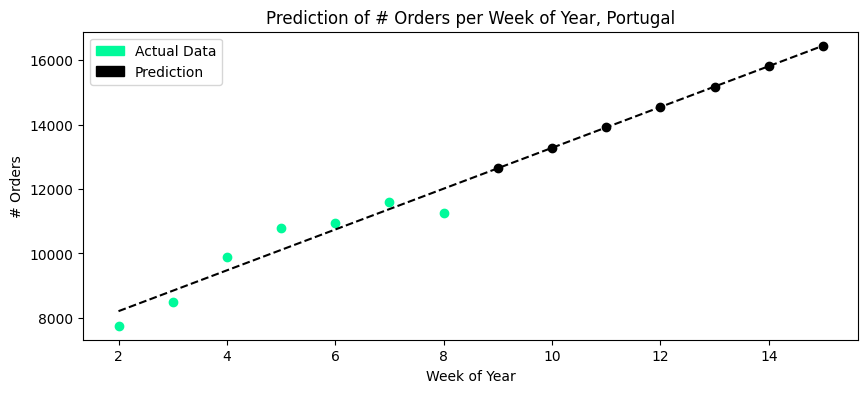

In [310]:
## Given we have few points, We'll do a simple Linear Regression 
df_portugal_predict = df_portugal_grouped_week_plot [["Week of Year","# Orders (Week)"]]

regressor = LinearRegression()

results = regressor.fit(df_portugal_predict[["Week of Year"]], df_portugal_predict[["# Orders (Week)"]])        
model = results.predict

full_weeks = pd.DataFrame({'Week of Year':[i for i in range(2,16)]})
predict_weeks = pd.DataFrame({'Week of Year':[i for i in range(9,16)]})

orders_fit_full = model(full_weeks)
orders_fit_predict = model(predict_weeks)

plt.figure(figsize=(10,4))

plt.scatter(df_portugal_grouped_week_plot ["Week of Year"]
            , df_portugal_grouped_week_plot ["# Orders (Week)"]
            , color = "mediumspringgreen")

plt.plot(full_weeks, orders_fit_full, "k--") 

plt.scatter(predict_weeks
            , orders_fit_predict
            , color = "black")
plt.ylabel("# Orders")  
plt.xlabel("Week of Year")  
plt.title("Prediction of # Orders per Week of Year, Portugal") 

patch_1 = mpatches.Patch(color='mediumspringgreen', label='Actual Data')
patch_2 = mpatches.Patch(color='black', label='Prediction')
plt.legend(handles=[patch_1, patch_2])

In [355]:
df_portugal_predict_ref = pd.concat([pd.DataFrame(predict_weeks),pd.DataFrame(orders_fit_predict)], axis = 1 ).rename(columns={0:"Predicted Week Orders"})
df_march_portugal = df_march_portugal.merge(df_portugal_predict_ref, how ='inner')
df_march_portugal ["Predicted Orders"] = df_march_portugal ["Predicted Week Orders"] * df_march_portugal ["perc. of weekly orders"]
print("Expected oders in march: ", round(df_march_portugal["Predicted Orders"].sum()))
df_march_portugal.head(10)

Expected oders in march:  62574


,Order Date,Week Day,Week of Year,perc. of weekly orders,Predicted Week Orders,Predicted Orders
0,2020-03-01,1 - Sunday,9,0.126295,12645.285714,1597.033601
1,2020-03-02,2 - Monday,10,0.120891,13279.464286,1605.370876
2,2020-03-03,3 - Tuesday,10,0.135459,13279.464286,1798.829464
3,2020-03-04,4 - Wednesday,10,0.159747,13279.464286,2121.351065
4,2020-03-05,5 - Thursday,10,0.173038,13279.464286,2297.855908
5,2020-03-06,6 - Friday,10,0.165937,13279.464286,2203.554677
6,2020-03-07,7 - Saturday,10,0.118632,13279.464286,1575.375250
7,2020-03-08,1 - Sunday,10,0.126295,13279.464286,1677.127045
8,2020-03-09,2 - Monday,11,0.120891,13913.642857,1682.037509
9,2020-03-10,3 - Tuesday,11,0.135459,13913.642857,1884.734970


C:\Users\jpgsa\AppData\Local\Temp\ipykernel_23084\3672417547.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(df_march_portugal["Order Date"], df_march_portugal["Predicted Orders"],'k--' , marker = "*", color = "black")


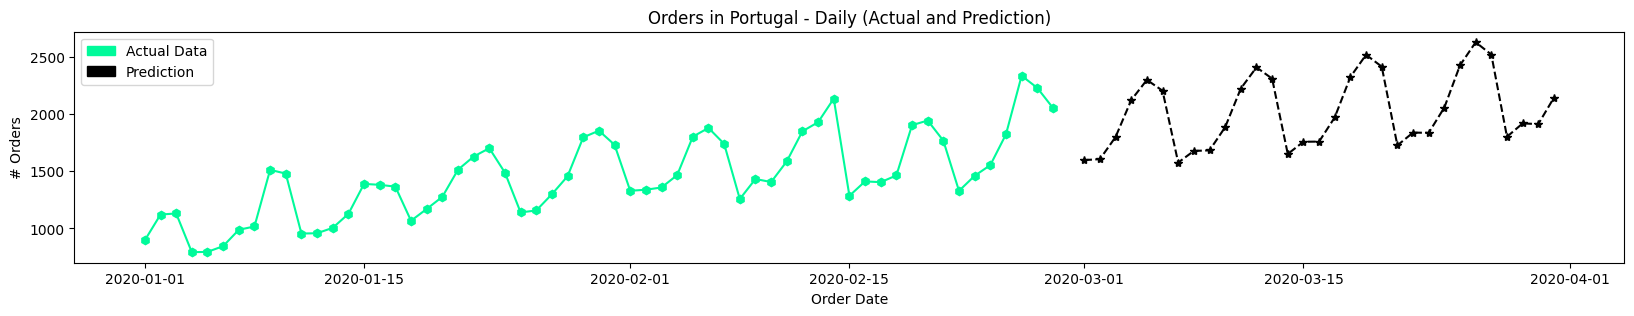

In [364]:
plt.figure(figsize=(20,3))
plt.plot(df_portugal_grouped ["Created Date"], df_portugal_grouped ["# Orders"], marker = "h", color = "mediumspringgreen")
plt.plot(df_march_portugal["Order Date"], df_march_portugal["Predicted Orders"],'k--' , marker = "*", color = "black")


plt.xlabel('Order Date')  
plt.ylabel('# Orders')  
plt.title("Orders in Portugal - Daily (Actual and Prediction)") 

patch_1 = mpatches.Patch(color='mediumspringgreen', label='Actual Data')
patch_2 = mpatches.Patch(color='black', label='Prediction')
plt.legend(handles=[patch_1, patch_2])

##### 2.2) Predicting Ghana's March

In [358]:
df_march_ghana = pd.DataFrame()
march_days = []
weekref = {0:'2 - Monday', 1:'3 - Tuesday', 2:'4 - Wednesday ', 3:'5 - Thursday', 4:'6 - Friday', 5:'7 - Saturday', 6:'1 - Sunday'}

for i in range(31):
    new_date = datetime.date(2020,3,i+1)
    march_days.append(new_date)

df_march_ghana["Order Date"] = march_days
df_march_ghana["Week Day"] = df_march_ghana["Order Date"].apply(lambda x: weekref[x.weekday()])
df_march_ghana["Week of Year"] = df_march_ghana["Order Date"].apply(lambda x: x.isocalendar()[1])

df_ghana_day_of_week = df_ghana_grouped_2.groupby("Week Day").mean()["perc. of weekly orders"].reset_index()

df_march_ghana = df_march_ghana.merge(df_ghana_day_of_week, how = "inner").sort_values("Order Date")
df_march_ghana.head(5)

,Order Date,Week Day,Week of Year,perc. of weekly orders
0,2020-03-01,1 - Sunday,9,0.157283
5,2020-03-02,2 - Monday,10,0.146541
10,2020-03-03,3 - Tuesday,10,0.151788
15,2020-03-04,4 - Wednesday,10,0.148663
19,2020-03-05,5 - Thursday,10,0.137667


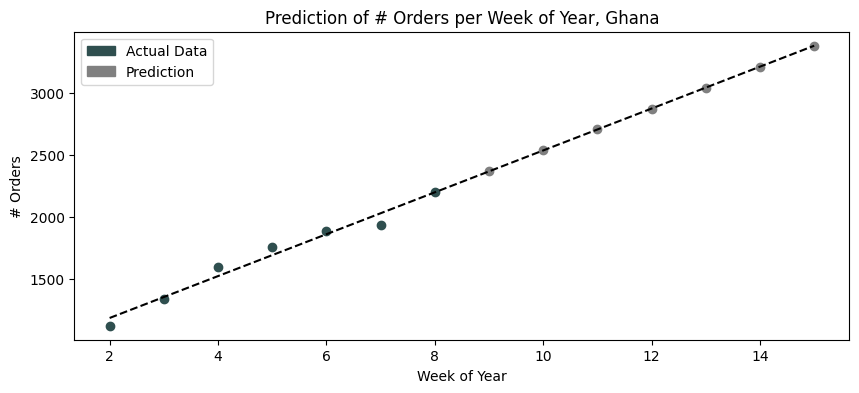

In [370]:
## Given we have few points, We'll do a simple Linear Regression 
df_ghana_predict = df_ghana_grouped_week_plot [["Week of Year","# Orders (Week)"]]

regressor = LinearRegression()

results = regressor.fit(df_ghana_predict[["Week of Year"]], df_ghana_predict[["# Orders (Week)"]])        
model = results.predict

full_weeks = pd.DataFrame({'Week of Year':[i for i in range(2,16)]})
predict_weeks = pd.DataFrame({'Week of Year':[i for i in range(9,16)]})

orders_fit_full = model(full_weeks)
orders_fit_predict = model(predict_weeks)

plt.figure(figsize=(10,4))

plt.scatter(df_ghana_grouped_week_plot ["Week of Year"]
            , df_ghana_grouped_week_plot ["# Orders (Week)"]
            , color = "darkslategrey")

plt.plot(full_weeks, orders_fit_full, "k--") 

plt.scatter(predict_weeks
            , orders_fit_predict
            , color = "grey")
plt.ylabel("# Orders")  
plt.xlabel("Week of Year")  
plt.title("Prediction of # Orders per Week of Year, Ghana") 

patch_1 = mpatches.Patch(color='darkslategrey', label='Actual Data')
patch_2 = mpatches.Patch(color='grey', label='Prediction')
plt.legend(handles=[patch_1, patch_2])

In [360]:
df_ghana_predict_ref = pd.concat([pd.DataFrame(predict_weeks),pd.DataFrame(orders_fit_predict)], axis = 1 ).rename(columns={0:"Predicted Week Orders"})
df_march_ghana = df_march_ghana.merge(df_ghana_predict_ref, how ='inner')
df_march_ghana ["Predicted Orders"] = df_march_ghana ["Predicted Week Orders"] * df_march_ghana ["perc. of weekly orders"]
print("Expected oders in march: ", round(df_march_ghana["Predicted Orders"].sum()))
df_march_ghana.head(10)

Expected oders in march:  12480


,Order Date,Week Day,Week of Year,perc. of weekly orders,Predicted Week Orders,Predicted Orders
0,2020-03-01,1 - Sunday,9,0.157283,2366.571429,372.221219
1,2020-03-02,2 - Monday,10,0.146541,2535.035714,371.485938
2,2020-03-03,3 - Tuesday,10,0.151788,2535.035714,384.788146
3,2020-03-04,4 - Wednesday,10,0.148663,2535.035714,376.867018
4,2020-03-05,5 - Thursday,10,0.137667,2535.035714,348.991939
5,2020-03-06,6 - Friday,10,0.114645,2535.035714,290.629674
6,2020-03-07,7 - Saturday,10,0.143412,2535.035714,363.555229
7,2020-03-08,1 - Sunday,10,0.157283,2535.035714,398.717770
8,2020-03-09,2 - Monday,11,0.146541,2703.500000,396.172814
9,2020-03-10,3 - Tuesday,11,0.151788,2703.500000,410.359012


C:\Users\jpgsa\AppData\Local\Temp\ipykernel_23084\388542407.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(df_march_ghana["Order Date"], df_march_ghana["Predicted Orders"],'k--' , marker = "*", color = "grey")


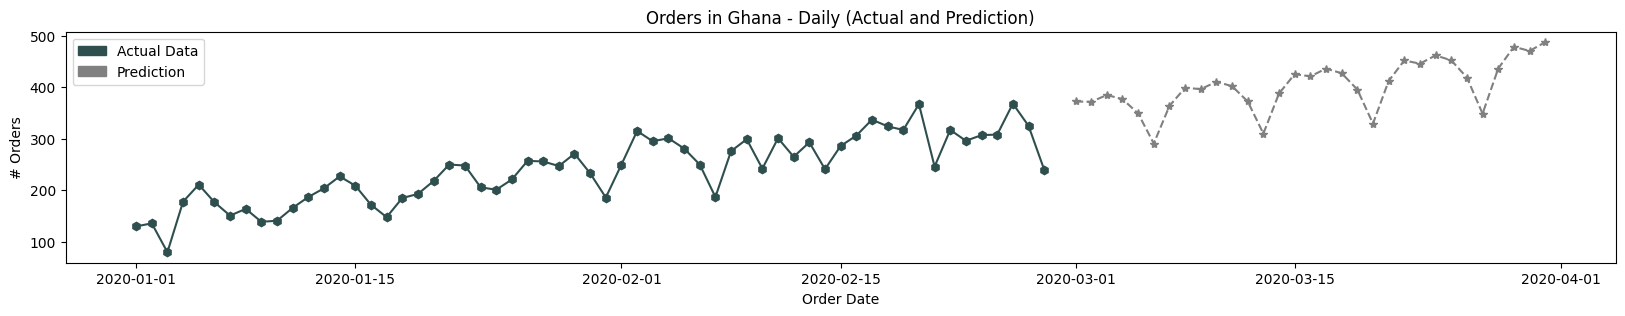

In [371]:
plt.figure(figsize=(20,3))
plt.plot(df_ghana_grouped ["Created Date"], df_ghana_grouped ["# Orders"], marker = "h", color = "darkslategrey")
plt.plot(df_march_ghana["Order Date"], df_march_ghana["Predicted Orders"],'k--' , marker = "*", color = "grey")


plt.xlabel('Order Date')  
plt.ylabel('# Orders')  
plt.title("Orders in Ghana - Daily (Actual and Prediction)") 

patch_1 = mpatches.Patch(color='darkslategrey', label='Actual Data')
patch_2 = mpatches.Patch(color='grey', label='Prediction')
plt.legend(handles=[patch_1, patch_2])